# **Song genre classification**

The task is to categorize songs into classes (Electronic, Rock etc.) based on song features such as duration, instrumentalness, popularity etc.
The data was obtained from kaggle.com.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from math import ceil

# Data exploration

In [2]:
data = pd.read_csv('music_genre.csv', delimiter=',',header=0)

In [3]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [4]:
print(data.shape)

(50005, 18)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

- *Data consists of 17 attributes and 1 target column music_genre*

music_genre
Alternative    5000
Anime          5000
Blues          5000
Classical      5000
Country        5000
Electronic     5000
Hip-Hop        5000
Jazz           5000
Rap            5000
Rock           5000
dtype: int64
Sum:  50000


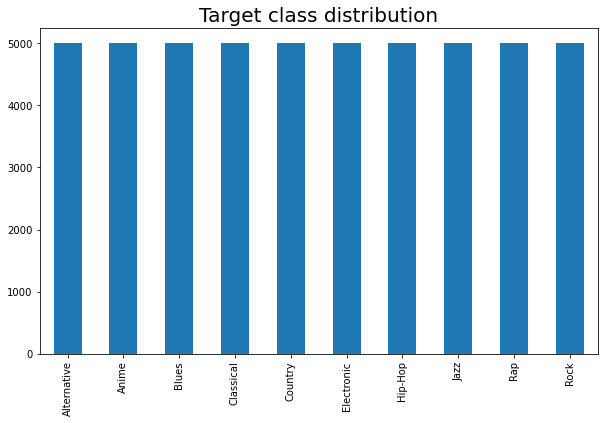

In [6]:
print(data.groupby(['music_genre']).size())
print("Sum: ", data.groupby(['music_genre']).size().sum())
data.groupby(['music_genre']).size().plot(kind='bar', figsize = (10,6))
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Target class distribution", fontsize = 20)
plt.show()

In [7]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


- *We have 10 targets - 10 music genres - for each 5000 instances*
- *There are 50005 entries but 50000 instances so there are 5 blank entries in data*

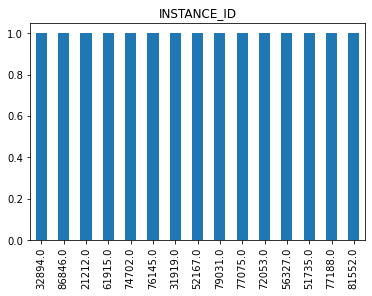

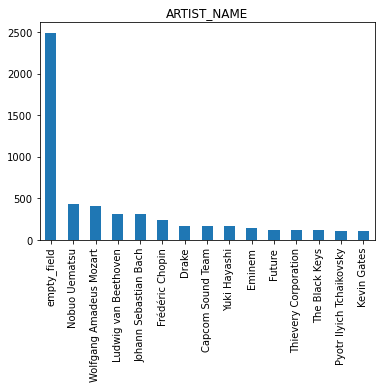

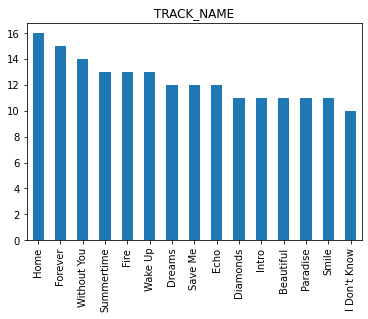

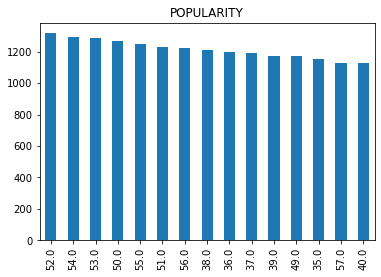

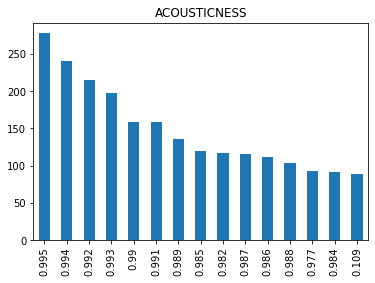

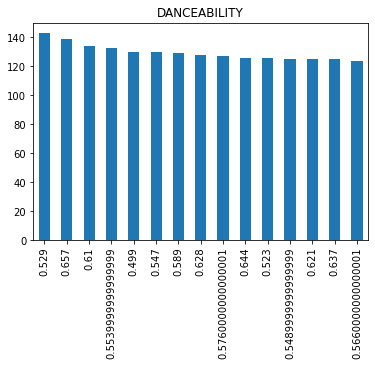

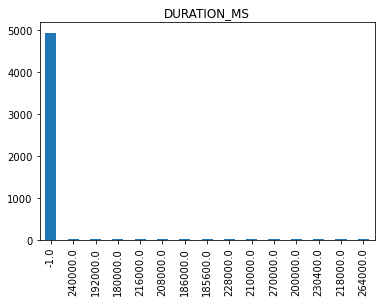

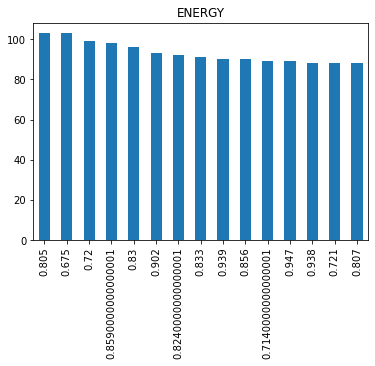

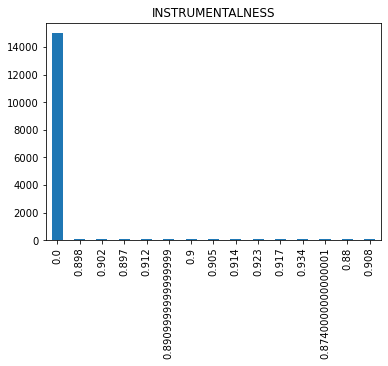

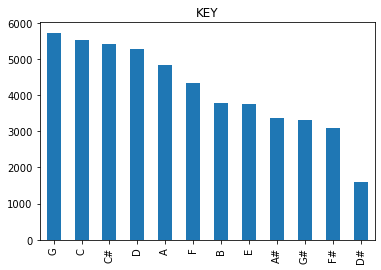

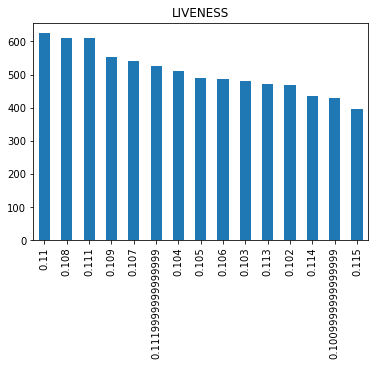

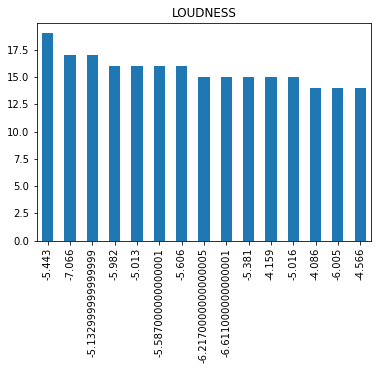

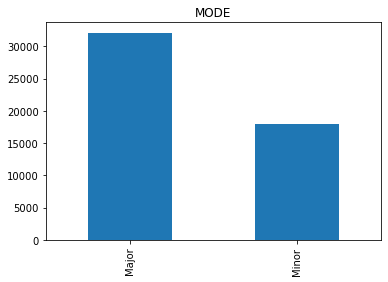

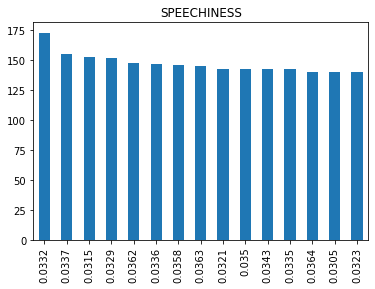

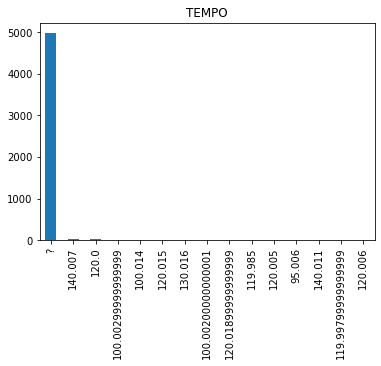

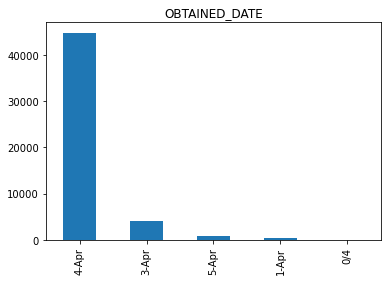

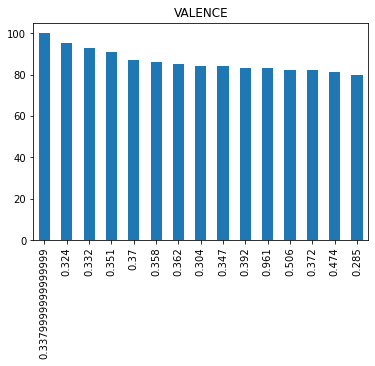

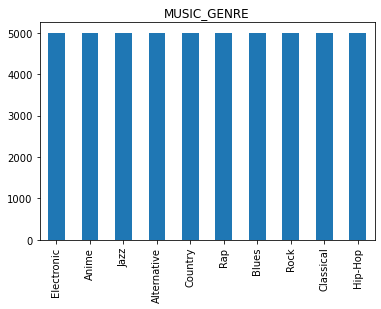

In [8]:
for column in data.columns:
    plt.figure()
    data[column].value_counts().head(15).plot.bar()
    plt.title(column.upper())

There are several missing values in data:
- unknown artist_name: "empty_field": 2489
- unknown duration_ms: -1 : 4939
- unknown tempo: '?' : 4980

### Distributions of features

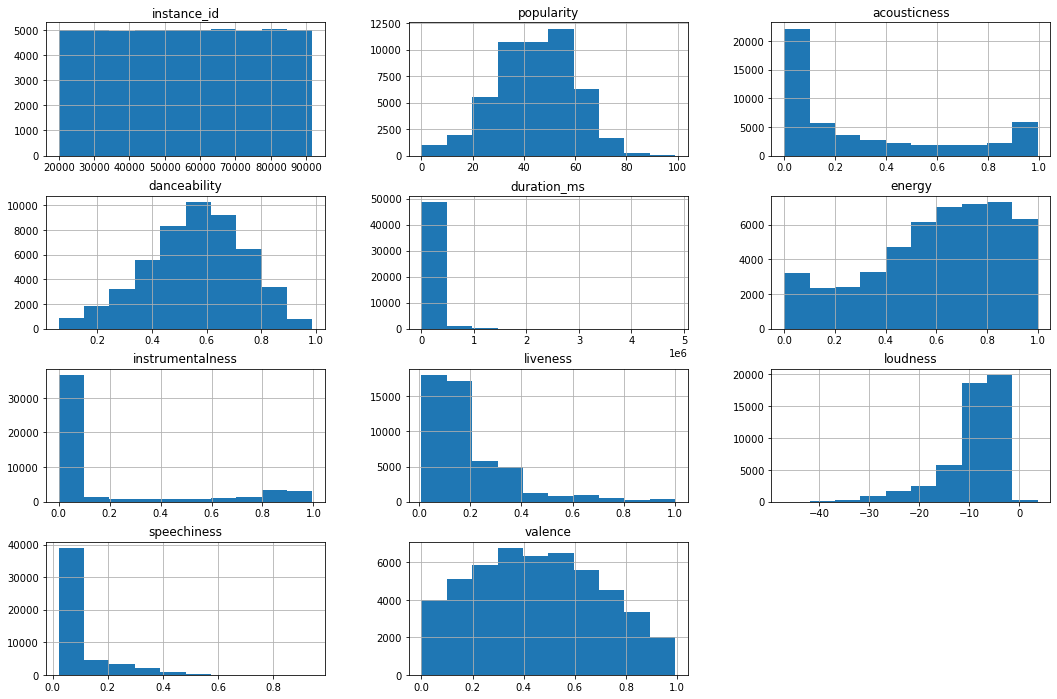

In [9]:
data.hist(figsize =(18,12))
plt.show()

# Data preparation

### 1. Removing 5 blank entries

In [10]:
data[data['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data = data.dropna(axis=0)
data[data['instance_id'].isna()]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


### 2. Changing values of column mode from object to int to: 0: Minor, 1: Major

In [12]:
data['mode'] = data['mode'].map({'Major': 1, 'Minor': 0})

### 3. Changing the uknown value (-1) of duration_ms to the mean value of duration_ms of all songs.

In [13]:
tmp = data[data['duration_ms'] != -1]
mean_duration_ms = tmp['duration_ms'].mean()
print(mean_duration_ms)

245503.54146601274


In [14]:
data.loc[data['duration_ms'] == -1, 'duration_ms'] = mean_duration_ms

### 4.Changing the unknown value ('?') of tempo to the mean value of tempo of all songs.

In [15]:
tmp = data[data['tempo'] != '?']
mean_tempo = tmp['tempo'].astype(float).mean()
print(mean_tempo)

119.95296059529068


In [16]:
data.loc[data['tempo'] == '?', 'tempo'] = mean_tempo
data['tempo'] = data['tempo'].astype('float')

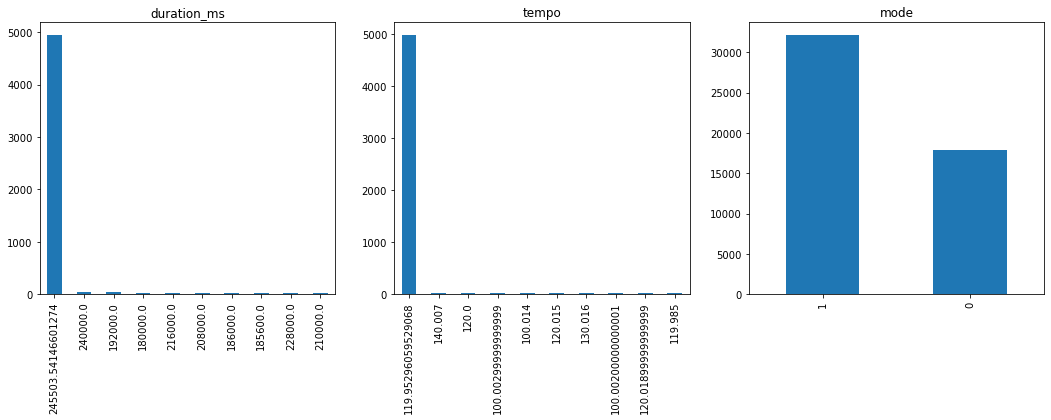

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
data['duration_ms'].value_counts().head(10).plot.bar(title='duration_ms', ax=ax1)
data['tempo'].value_counts().head(10).plot.bar(title='tempo', ax=ax2)
data['mode'].value_counts().head(10).plot.bar(title='mode', ax=ax3)
plt.show()

In [18]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,245503.541466,0.941,0.79200,A#,0.115,-5.201,0,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.000000,0.890,0.95000,D,0.124,-7.043,0,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.000000,0.755,0.01180,G#,0.534,-4.617,1,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.000000,0.700,0.00253,C#,0.157,-4.498,1,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.000000,0.587,0.90900,F#,0.157,-6.266,1,0.0413,145.036,4-Apr,0.323,Electronic


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  int64  
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

# Part 1 - predicting song genres by numerical attributes

### 1. Numerical attributes selection

In [23]:
numerical_attributes = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                          'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 
                          'speechiness', 'tempo', 'valence']

In [24]:
data1 = data[numerical_attributes + ['music_genre']]

In [25]:
data1.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
14891,40.0,0.959,0.588,375067.0,0.23400,0.60300,0.1030,-8.709,1,0.0334,69.110000,0.2510,Jazz
30050,27.0,0.486,0.404,604760.0,0.38500,0.00599,0.7040,-11.568,1,0.0334,119.952961,0.2830,Blues
34661,49.0,0.461,0.593,167840.0,0.55500,0.00010,0.0840,-14.291,1,0.0380,106.040000,0.7710,Blues
43026,41.0,0.983,0.154,644273.0,0.05730,0.93000,0.0552,-24.883,1,0.0352,90.050000,0.0384,Classical
44582,31.0,0.994,0.147,257000.0,0.00978,0.91500,0.1090,-29.588,1,0.0404,84.478000,0.0474,Classical


### 2. Comparison: mean values of attributes for each target.

In [26]:
for attribute in numerical_attributes:
    print(attribute.upper())
    print(data1.groupby(['music_genre'])[attribute].mean().sort_values(ascending=False),'\n')

POPULARITY
music_genre
Rap            60.4974
Rock           59.6412
Hip-Hop        58.3996
Alternative    50.2242
Country        46.0100
Jazz           40.9286
Electronic     38.1118
Blues          34.8040
Classical      29.3158
Anime          24.2716
Name: popularity, dtype: float64 

ACOUSTICNESS
music_genre
Classical      0.869139
Jazz           0.494564
Blues          0.317830
Anime          0.286968
Country        0.268827
Rock           0.191394
Hip-Hop        0.179093
Rap            0.169057
Alternative    0.164983
Electronic     0.121971
Name: acousticness, dtype: float64 

DANCEABILITY
music_genre
Hip-Hop        0.717373
Rap            0.696605
Electronic     0.619220
Jazz           0.584736
Country        0.577316
Alternative    0.541124
Rock           0.539230
Blues          0.529243
Anime          0.471002
Classical      0.306560
Name: danceability, dtype: float64 

DURATION_MS
music_genre
Classical      303104.910538
Electronic     268269.121906
Jazz           262495.5982

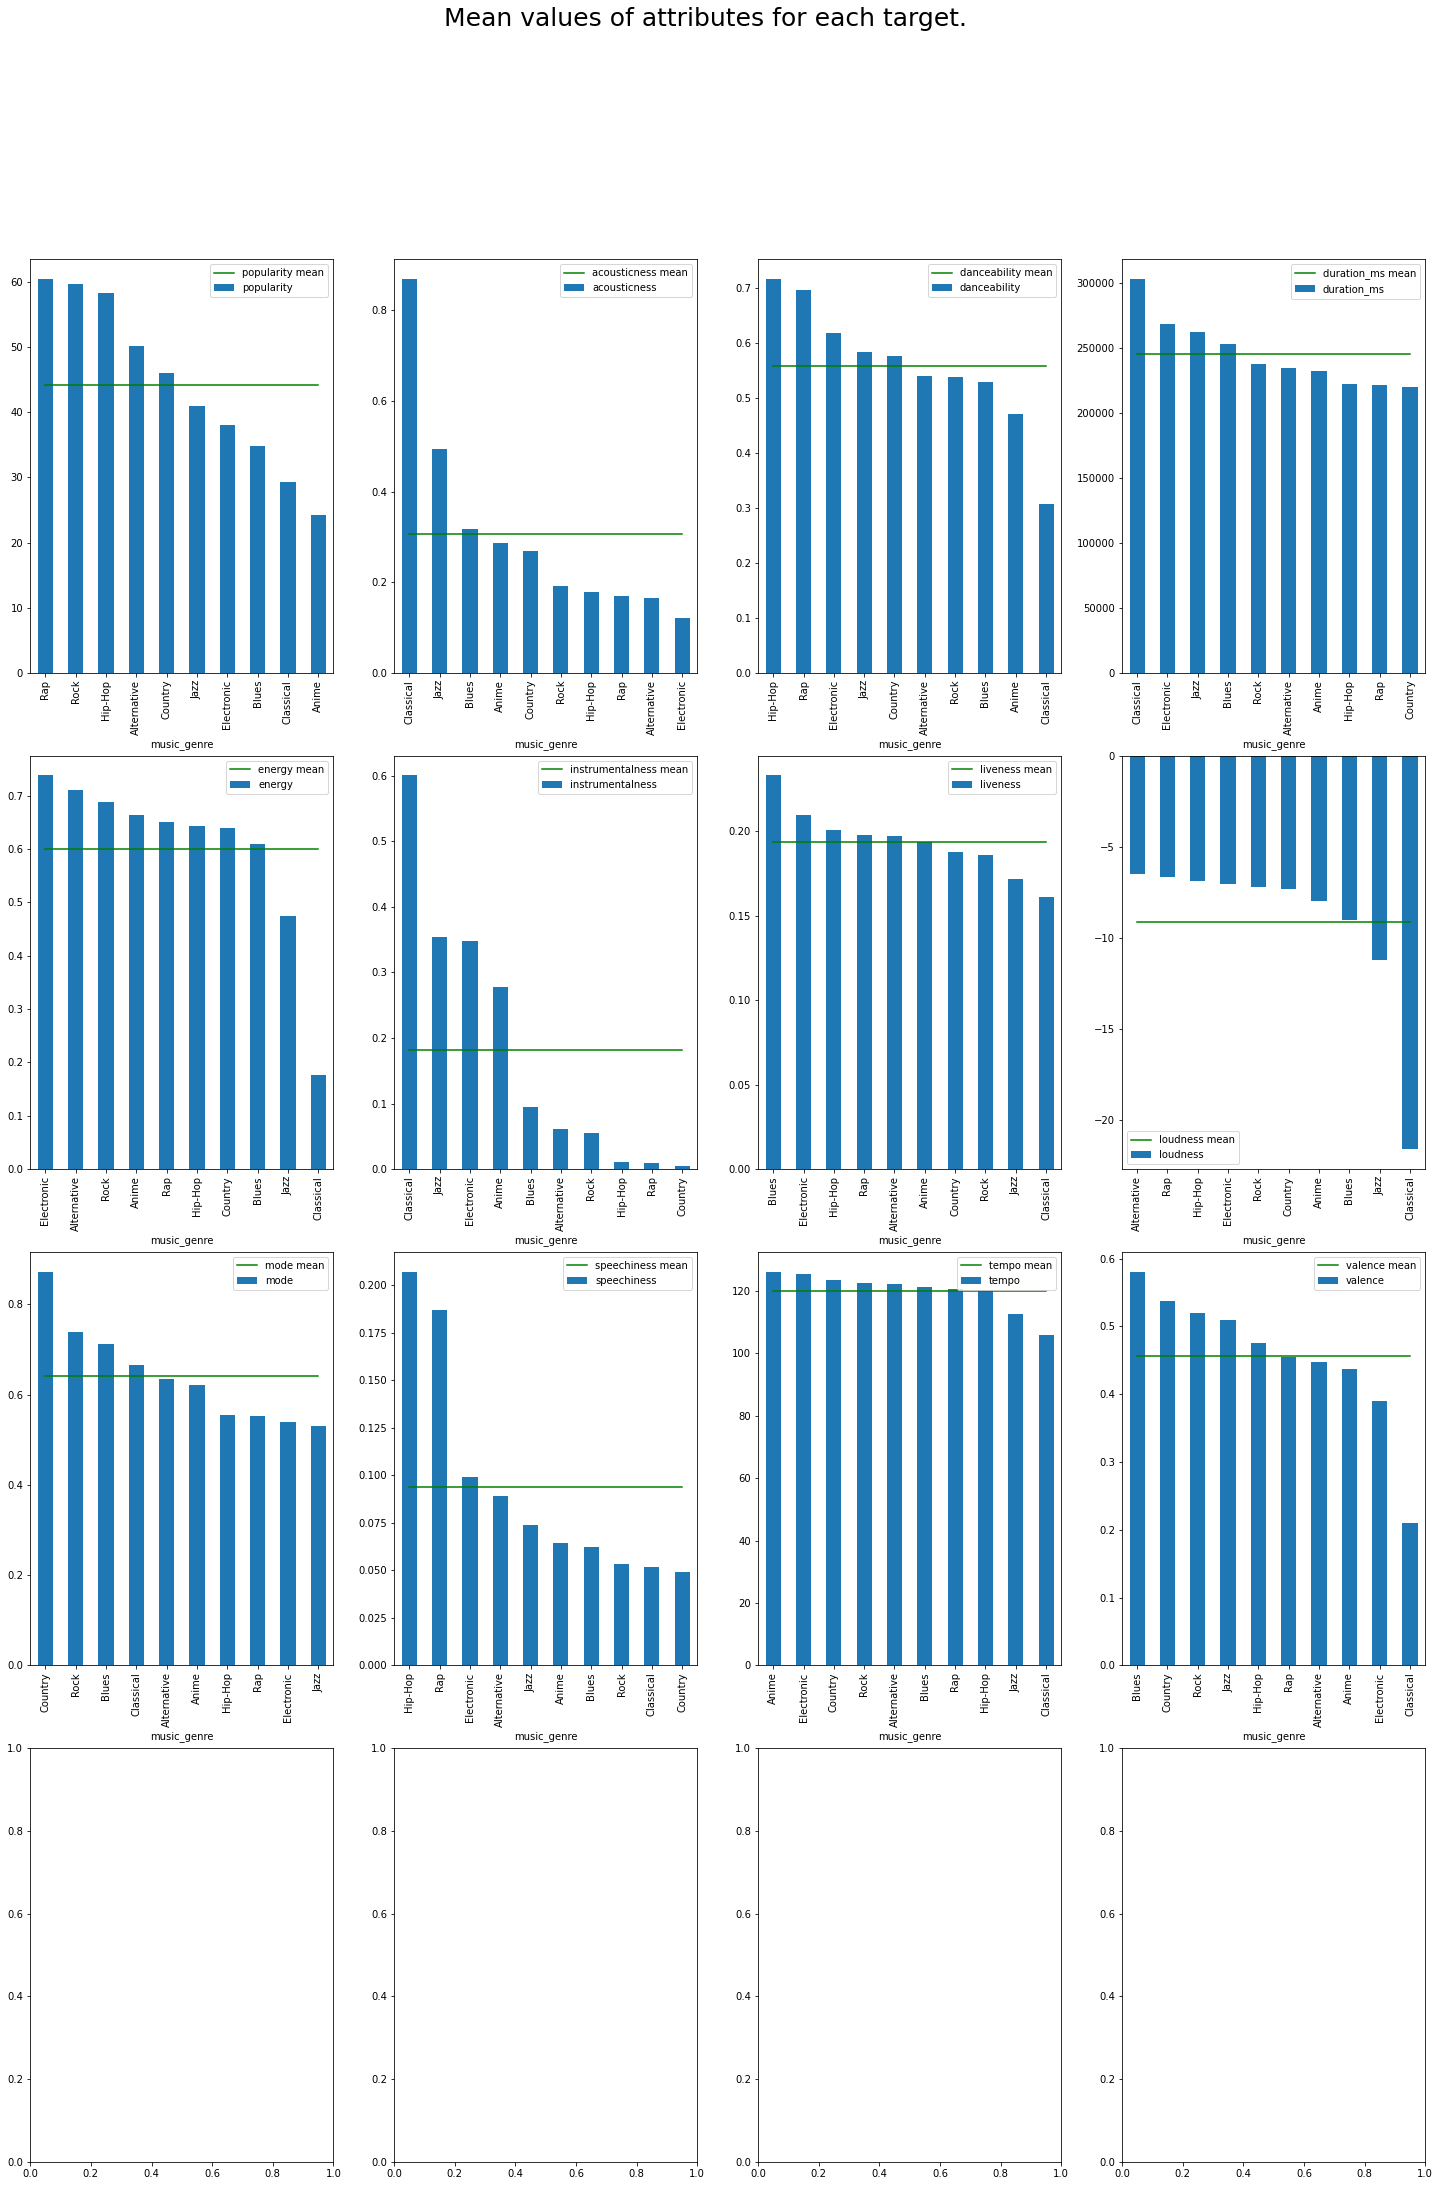

In [27]:
N = ceil(len(numerical_attributes) ** (1/2))
fig, axs = plt.subplots(N,N, figsize=(25,35))
from itertools import product
indexes = list(product(range(N), range(N)))

for attribute, (i,j) in zip(numerical_attributes, indexes):
    data1.groupby(['music_genre'])[attribute].mean().sort_values(ascending=False).plot.bar(ax=axs[i,j])
    axs[i,j].plot(data1.groupby(['music_genre'])[attribute].mean().sort_values(ascending=False).index, [data1[attribute].mean() for x in range(len(data1.music_genre.unique()))], 'green')
    axs[i,j].legend([attribute+' mean', attribute])

fig.suptitle('Mean values of attributes for each target.', fontsize=25)
plt.show()

Conclusions:
- For Classical genre duration, acousticness and instrumentalness are the highest (Classical genre seems to be predicted the best)
- For Rap and Hip-Hop genres mean values for all attributes are very similar. They always appear next to each other on the lists above. (They probably will tend to confuse)
- For Country and Rock genres mean values we can see also similarity for most of the attributes. 

## Data standardization

### 1. Values scaling using StandardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
std_scaler = StandardScaler()
df = data1.copy()
df.loc[:,numerical_attributes] = std_scaler.fit_transform(data1[numerical_attributes])
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,-1.108003,-0.883886,0.524878,2.751216e-16,1.289876,1.875809,-0.488113,0.638132,-1.339082,-0.185322,-0.655673,1.225073,Electronic
1,-0.850633,-0.860390,0.356933,-2.572242e-01,1.097101,2.361357,-0.432433,0.339248,-1.339082,-0.627258,-0.170280,0.302431,Electronic
2,-1.043661,-0.888632,0.345737,-2.825585e-01,0.586813,-0.521812,2.104140,0.732892,0.746780,-0.582867,0.276558,-0.498812,Electronic
3,-0.657606,-0.823184,1.207853,-7.432841e-01,0.378918,-0.550300,-0.228269,0.752201,0.746780,1.434452,0.277246,-0.753752,Electronic
4,-0.786291,-0.883974,0.446504,-2.186933e-01,-0.048212,2.235361,-0.228269,0.465324,0.746780,-0.515787,0.862689,-0.539278,Electronic


### 2. Changing the values of targets to numerical

In [30]:
df['music_genre'] = df['music_genre'].map({'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 
                                           'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 
                                           'Hip-Hop': 9})

In [31]:
df.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
11420,-0.721949,1.870931,-0.824278,0.772030,-1.533716,2.170826,-0.265390,-1.551736,-1.339082,-0.617393,0.280548,-1.467182,2
13693,-0.464579,0.344579,0.407317,1.656085,-1.280462,-0.557872,-0.061227,-0.300870,-1.339082,-0.504936,-1.290711,0.500718,2
14068,-0.014182,-0.897463,-0.169294,0.557634,1.422173,-0.303623,-0.615561,0.645271,0.746780,-0.013677,0.449075,-0.863013,2
19611,0.371872,-0.895253,-0.006947,-0.087068,1.433512,-0.373689,-1.024506,0.721047,-1.339082,0.191507,0.552289,-0.919666,3
3109,-0.400237,-0.543108,-0.684324,2.108700,-0.293906,2.373649,1.522584,-0.450474,-1.339082,-0.599637,1.463713,0.108190,0


## Prediction

The following algorithms will be used:
- Naive Bayes
- KNN
- Decision Tree
- Logistic Regression

In [49]:
df_scores = pd.DataFrame(data=np.zeros((3,4)), columns=['KNN', 'LogReg', 'DTree', 'NBayes'], index=['part1', 'part2', 'part3'])
df_scores

,KNN,LogReg,DTree,NBayes
part1,0.0,0.0,0.0,0.0
part2,0.0,0.0,0.0,0.0
part3,0.0,0.0,0.0,0.0


### 1. Split data into training and testing sets

In [35]:
X = df[numerical_attributes]
Y = df['music_genre']
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [36]:
scoring = 'accuracy'

### 2. Spot Check Algorithm

In [37]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class='ovr')))

### 3. Evaluate each model in turn using K-cross validation

In [38]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.486125 (0.005745)
DTC: 0.440525 (0.008899)
NB: 0.435875 (0.008951)
LR: 0.508275 (0.006227)


Target classes:
- 'Electronic': 0, 
- 'Anime': 1, 
- 'Jazz': 2, 
- 'Alternative': 3, 
- 'Country': 4, 
- 'Rap': 5, 
- 'Blues': 6, 
- 'Rock': 7, 
- 'Classical': 8, 
- 'Hip-Hop': 9

In [39]:
target_names = list(data['music_genre'].unique())

## KNN Prediction

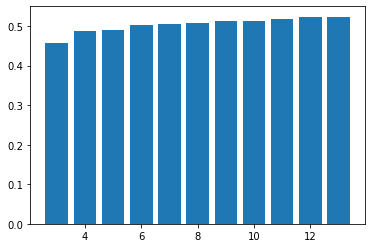

In [40]:
accuracies = {}
for neighbor in range(3, 14):
    knn = KNeighborsClassifier(n_neighbors=neighbor, weights='uniform')
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    accuracies[neighbor] = (accuracy_score(Y_test, predictions))
plt.bar(accuracies.keys(), accuracies.values())
plt.show()

In [50]:
max_key = max(accuracies, key=accuracies.get)
print(f"Best score for KNN = {accuracies[max_key]*100:.2f}%, n_neighbors={max_key}")
df_scores.loc['part1', 'KNN'] = accuracies[max_key]*100

Best score for KNN = 52.34%, n_neighbors=12


## Logistic Regression Prediction

In [52]:
from sklearn.model_selection import ParameterGrid
grid={'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'penalty' : ['l2']}

In [53]:
lr = LogisticRegression()
accuracies = []
for g in ParameterGrid(grid):
    lr.set_params(**g)
    lr.fit(X_train,Y_train)
    predictions = lr.predict(X_test)
    accuracies.append(accuracy_score(Y_test, predictions))

C:\Users\Filip KOSELSKI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Filip KOSELSKI\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [54]:
best_idx = np.argmax(accuracies)
print(f'Best score for Logistic Regression = {accuracies[best_idx]*100:.2f}%', ParameterGrid(grid)[best_idx])
df_scores.loc['part1', 'LogReg'] = accuracies[best_idx]*100

Best score for Logistic Regression = 52.82% {'solver': 'newton-cg', 'penalty': 'l2'}


## Decision Tree Prediction

In [55]:
grid={'max_depth' : list(range(5,16)), 'criterion' : ['entropy'], 'class_weight' : ['balanced', None], 'max_features' : ['auto', 'sqrt', 'log2', None, 3, 4, 5]}

In [56]:
dtc = DecisionTreeClassifier()
accuracies = []
for g in ParameterGrid(grid):
    dtc.set_params(**g) 
    dtc.fit(X_train,Y_train)
    predictions = dtc.predict(X_test)
    accuracies.append(accuracy_score(Y_test, predictions))

In [57]:
best_idx = np.argmax(accuracies)
print(f'Best score for Decision Tree Classifier = {accuracies[best_idx]*100:.2f}%', ParameterGrid(grid)[best_idx])
df_scores.loc['part1', 'DTree'] = accuracies[best_idx]*100

Best score for Decision Tree Classifier = 53.36% {'max_features': None, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None}


## Naive Bayes Prediction

In [58]:
grid = {'var_smoothing': np.logspace(0,-12, num=13)}

In [59]:
nb = GaussianNB()
accuracies = []
for g in ParameterGrid(grid):
    nb.set_params(**g) 
    nb.fit(X_train,Y_train)
    predictions = nb.predict(X_test)
    accuracies.append(accuracy_score(Y_test, predictions))

In [60]:
best_idx = np.argmax(accuracies)
print(f'Best score for Naive Bayes = {accuracies[best_idx]*100:.2f}%', ParameterGrid(grid)[best_idx])
df_scores.loc['part1', 'NBayes'] = accuracies[best_idx]*100

Best score for Naive Bayes = 44.31% {'var_smoothing': 0.1}


## Classification_report for best performance - Decision Tree Classifier

In [62]:
dtc = DecisionTreeClassifier(max_features=None, max_depth=10, criterion='entropy', class_weight= None)
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_test)
print(classification_report(Y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

  Electronic       0.57      0.53      0.55       966
       Anime       0.71      0.71      0.71       986
        Jazz       0.47      0.48      0.48       993
 Alternative       0.40      0.32      0.36      1030
     Country       0.51      0.52      0.52       991
         Rap       0.41      0.54      0.47       951
       Blues       0.55      0.45      0.50      1074
        Rock       0.47      0.71      0.57       974
   Classical       0.83      0.79      0.81      1007
     Hip-Hop       0.42      0.31      0.36      1028

    accuracy                           0.53     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.53      0.53     10000



Conclusions:
 - according to previous conclusions Classical genre has the best scores of precision. recall and f1-score
 - the second highest score has Anime genre (perhaps because it's not typical)
 - Rap and Hip-Hop have one of the worst scores

# Part 2: Modification - adding track_name sentiment intensity analysis

I decided to use only track_name sentiment intensity analysis because a lot of instances have unknown artist (marked as empty_field) and a lot of instances of this attribute were just first name and last name of artist.

Example of working SentimentIntensityAnalyzer

In [63]:
sentences = list(data.sample(5)['track_name'])

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [65]:
sid = SentimentIntensityAnalyzer()
for sentence in sentences:
  print(sentence)
  ss = sid.polarity_scores(sentence)
  for k in sorted(ss):
    print('{0}: {1}, '.format(k, ss[k]), end='')
  print()

La flaca
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Blue As The Turquoise Night of Neyshabur - Edited Version
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Someday
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Twenty-Somethings
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 
Creole Moon
compound: 0.0, neg: 0.0, neu: 1.0, pos: 0.0, 


## Data preparation

In [66]:
numerical_attributes = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                          'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 
                          'speechiness', 'tempo', 'valence']

In [67]:
df2 = data.copy()
df2 = data[['track_name'] + numerical_attributes + ['music_genre']]

In [68]:
df2.sample(5)

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
23657,Gateway Love,52.0,0.0704,0.685,206507.000000,0.595,0.000004,0.0753,-7.083,1,0.0453,91.010000,0.596,Country
33741,Don't Know What It Means,39.0,0.4330,0.646,358253.000000,0.622,0.014300,0.3650,-9.203,0,0.0348,91.926000,0.806,Blues
6598,Goku's Spirit Bomb,22.0,0.0124,0.290,245503.541466,0.311,0.694000,0.7210,-13.476,0,0.0332,119.952961,0.050,Anime
21844,Turn! Turn! Turn! (To Everything There Is a Se...,69.0,0.1350,0.452,229360.000000,0.818,0.000027,0.0520,-8.124,1,0.0439,119.952961,0.755,Country
19115,Flyin' High (feat. Zac Brown),41.0,0.1460,0.517,242880.000000,0.771,0.000002,0.1110,-3.899,1,0.0384,148.780000,0.850,Alternative


### 1. Adding sentiment analysis features to data

In [69]:
df2['track_name_neg'] = data['track_name'].apply(lambda x: sid.polarity_scores(x)['neg'])
df2['track_name_pos'] = data['track_name'].apply(lambda x: sid.polarity_scores(x)['pos'])
df2['track_name_neu'] = data['track_name'].apply(lambda x: sid.polarity_scores(x)['neu'])
df2['track_name_compound'] = data['track_name'].apply(lambda x: sid.polarity_scores(x)['compound'])

C:\Users\FILIPK~1\AppData\Local\Temp/ipykernel_3808/3238757124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_name_neg'] = data['track_name'].apply(lambda x: sid.polarity_scores(x)['neg'])
C:\Users\FILIPK~1\AppData\Local\Temp/ipykernel_3808/3238757124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['track_name_pos'] = data['track_name'].apply(lambda x: sid.polarity_scores(x)['pos'])
C:\Users\FILIPK~1\AppData\Local\Temp/ipykernel_3808/3238757124.py:3: SettingWithCopyWarning: 
A value 

In [70]:
df2.sample(7)

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre,track_name_neg,track_name_pos,track_name_neu,track_name_compound
41074,Old Refrain (Kreisler),50.0,0.94500,0.147,223028.0,0.0916,0.671000,0.0931,-21.506,1,0.0461,159.144,0.0790,Classical,0.0,0.0,1.0,0.0
11034,Nightfall,36.0,0.48100,0.718,285533.0,0.5480,0.857000,0.0892,-11.204,1,0.0316,109.960,0.6290,Jazz,0.0,0.0,1.0,0.0
42266,Alhaiya Bilaval,38.0,0.39900,0.291,249040.0,0.3800,0.002920,0.4410,-16.898,1,0.0376,149.819,0.4910,Classical,0.0,0.0,1.0,0.0
6765,キセキ,57.0,0.09320,0.641,271160.0,0.6180,0.000000,0.1550,-4.269,1,0.0259,90.032,0.3380,Anime,0.0,0.0,1.0,0.0
37066,We Will Rock You - Movie Mix,62.0,0.11700,0.640,129093.0,0.5930,0.000001,0.7800,-6.240,0,0.1210,81.402,0.4070,Rock,0.0,0.0,1.0,0.0
43851,Responsories for Maundy Thursday Nocturn 2: I....,30.0,0.99400,0.126,180613.0,0.0722,0.004170,0.1110,-22.114,0,0.0430,79.090,0.0384,Classical,0.0,0.0,1.0,0.0
48385,Big Bag,55.0,0.00608,0.675,85413.0,0.5590,0.000097,0.0843,-9.003,0,0.1060,117.845,0.6680,Hip-Hop,0.0,0.0,1.0,0.0


In [71]:
numerical_attributes += ['track_name_compound', 'track_name_neg', 'track_name_pos', 'track_name_neu']

In [72]:
numerical_attributes

['popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence',
 'track_name_compound',
 'track_name_neg',
 'track_name_pos',
 'track_name_neu']

### 2. Comparison: mean values of attributes for each target.

In [73]:
for attribute in numerical_attributes:
    print(attribute.upper())
    print(df2.groupby(['music_genre'])[attribute].mean().sort_values(ascending=False),'\n')

POPULARITY
music_genre
Rap            60.4974
Rock           59.6412
Hip-Hop        58.3996
Alternative    50.2242
Country        46.0100
Jazz           40.9286
Electronic     38.1118
Blues          34.8040
Classical      29.3158
Anime          24.2716
Name: popularity, dtype: float64 

ACOUSTICNESS
music_genre
Classical      0.869139
Jazz           0.494564
Blues          0.317830
Anime          0.286968
Country        0.268827
Rock           0.191394
Hip-Hop        0.179093
Rap            0.169057
Alternative    0.164983
Electronic     0.121971
Name: acousticness, dtype: float64 

DANCEABILITY
music_genre
Hip-Hop        0.717373
Rap            0.696605
Electronic     0.619220
Jazz           0.584736
Country        0.577316
Alternative    0.541124
Rock           0.539230
Blues          0.529243
Anime          0.471002
Classical      0.306560
Name: danceability, dtype: float64 

DURATION_MS
music_genre
Classical      303104.910538
Electronic     268269.121906
Jazz           262495.5982

Conclusions:
- we expect insignificant changes after adding sentiment analysis for track_name

### 3. Data standardization

In [74]:
std_scaler = StandardScaler()
df2[numerical_attributes] = std_scaler.fit_transform(df2[numerical_attributes])
df2.head()

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre,track_name_neg,track_name_pos,track_name_neu,track_name_compound
0,Röyksopp's Night Out,-1.108003,-0.883886,0.524878,2.751216e-16,1.289876,1.875809,-0.488113,0.638132,-1.339082,-0.185322,-0.655673,1.225073,Electronic,-0.377802,-0.391209,0.573406,-0.033041
1,The Shining Path,-0.850633,-0.860390,0.356933,-2.572242e-01,1.097101,2.361357,-0.432433,0.339248,-1.339082,-0.627258,-0.170280,0.302431,Electronic,-0.377802,-0.391209,0.573406,-0.033041
2,Hurricane,-1.043661,-0.888632,0.345737,-2.825585e-01,0.586813,-0.521812,2.104140,0.732892,0.746780,-0.582867,0.276558,-0.498812,Electronic,-0.377802,-0.391209,0.573406,-0.033041
3,Nitro,-0.657606,-0.823184,1.207853,-7.432841e-01,0.378918,-0.550300,-0.228269,0.752201,0.746780,1.434452,0.277246,-0.753752,Electronic,-0.377802,-0.391209,0.573406,-0.033041
4,Divide & Conquer,-0.786291,-0.883974,0.446504,-2.186933e-01,-0.048212,2.235361,-0.228269,0.465324,0.746780,-0.515787,0.862689,-0.539278,Electronic,-0.377802,-0.391209,0.573406,-0.033041


### 4. Changing the values of targets to numerical

In [75]:
df2['music_genre'] = df2['music_genre'].map({'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 
                                           'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8, 
                                           'Hip-Hop': 9})
df2.sample(5)

,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre,track_name_neg,track_name_pos,track_name_neu,track_name_compound
43539,Guillaume Tell: Guillaume Tell: Overture,-0.142867,1.727378,-1.568833,4.250150,-1.752951,1.503966,0.093442,-1.527559,0.746780,-0.483234,-9.286413e-15,-1.470014,8,-0.377802,-0.391209,0.573406,-0.033041
36112,But It's Better If You Do,1.143981,-0.716837,-0.510781,-0.375776,0.938344,-0.558074,0.594570,0.985045,-1.339082,-0.216889,1.722522e+00,0.881106,7,-0.377802,1.582990,-0.926035,2.414633
38552,High School Never Ends - Main Version - Explicit,1.208323,-0.861855,-0.124508,-0.344694,1.221838,-0.558074,-0.321071,0.915111,0.746780,0.309883,1.378383e+00,1.269587,7,-0.377802,-0.391209,0.573406,-0.033041
24101,Six Degrees of Separation,-0.593264,-0.241353,-0.829876,-0.527961,0.186142,-0.558074,-0.543794,0.571605,-1.339082,-0.403330,2.131712e-01,-0.535232,4,-0.377802,-0.391209,0.573406,-0.033041
20070,Homegrown,1.530035,-0.842226,0.888758,-0.382884,0.741789,-0.557800,-0.024106,0.885417,0.746780,-0.624298,-5.136974e-01,1.965615,4,-0.377802,-0.391209,0.573406,-0.033041


## Prediction for modified data

In [76]:
X = df2[numerical_attributes]
Y = df2['music_genre']
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
scoring = 'accuracy'

Targets:
- 'Electronic': 0, 
- 'Anime': 1, 
- 'Jazz': 2, 
- 'Alternative': 3, 
- 'Country': 4, 
- 'Rap': 5, 
- 'Blues': 6, 
- 'Rock': 7, 
- 'Classical': 8, 
- 'Hip-Hop': 9

In [77]:
target_names = list(data['music_genre'].unique())

### Logistic Regression

In [78]:
lr = LogisticRegression(solver='newton-cg', penalty='l2')
lr.fit(X_train,Y_train)
predictions = lr.predict(X_test)
print(accuracy_score(Y_test, predictions)*100, '%')
df_scores.loc['part2', 'LogReg'] = accuracy_score(Y_test, predictions)*100

52.92 %


### Decision Tree Classifier

In [79]:
dtc = DecisionTreeClassifier(max_features=None, max_depth=10, criterion='entropy', class_weight= None)
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_test)
print(accuracy_score(Y_test, predictions)*100, '%')
print(classification_report(Y_test, predictions, target_names=target_names))
df_scores.loc['part2', 'DTree'] = accuracy_score(Y_test, predictions)*100

53.31 %
              precision    recall  f1-score   support

  Electronic       0.57      0.53      0.55       966
       Anime       0.72      0.71      0.71       986
        Jazz       0.46      0.47      0.47       993
 Alternative       0.40      0.32      0.36      1030
     Country       0.51      0.52      0.52       991
         Rap       0.41      0.53      0.47       951
       Blues       0.55      0.45      0.50      1074
        Rock       0.47      0.71      0.57       974
   Classical       0.82      0.80      0.81      1007
     Hip-Hop       0.42      0.31      0.36      1028

    accuracy                           0.53     10000
   macro avg       0.54      0.54      0.53     10000
weighted avg       0.54      0.53      0.53     10000



### Naive Bayes

In [80]:
nb = GaussianNB(var_smoothing=0.1)
nb.fit(X_train,Y_train)
predictions = nb.predict(X_test)
print(accuracy_score(Y_test, predictions)*100, '%')
df_scores.loc['part2', 'NBayes'] = accuracy_score(Y_test, predictions)*100

44.4 %


In [82]:
df_scores.loc['part2', 'KNN'] = np.nan
df_scores

,KNN,LogReg,DTree,NBayes
part1,52.34,52.82,53.36,44.31
part2,NaN,52.92,53.31,44.40
part3,0.00,0.00,0.00,0.00


### Final Conclusions for Part 1 and 2

- The best obtained accuracy score: 53.36 % for Decision Tree Classifier
- Decision Tree Classifier gives the best results for the accuracy metric
- Perhaps taking into account 'key' attribute could result in better performance
- There is too little information in short track names.
- Sentiment intensity analysis could be better with having song lyrics in the data

# Part 3 - RAP and HIP-HOP genres merged

In order to improve performance of song genre prediction the idea is to merge similar genres - Rap and Hip-Hop to single target - Rap.
Our new targets:
- 'Electronic': 0, 
- 'Anime': 1, 
- 'Jazz': 2, 
- 'Alternative': 3, 
- 'Country': 4, 
- 'Rap': 5, 
- 'Blues': 6, 
- 'Rock': 7, 
- 'Classical': 8, 

Due to the fact that the sentiment analysis of song names did not significantly improve prediction performance, it was decided not to use it

In [83]:
numerical_attributes = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                          'energy', 'instrumentalness', 'liveness', 'loudness', 'mode', 
                          'speechiness', 'tempo', 'valence']

In [84]:
df1 = data.copy()
df1 = data[numerical_attributes + ['music_genre']]

Merging genres

In [85]:
df1.loc[data['music_genre'] == 'Hip-Hop', 'music_genre'] = 'Rap'

In [86]:
df1.groupby(['music_genre']).count()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence
music_genre,,,,,,,,,,,,
Alternative,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
Anime,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
Blues,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
Classical,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
Country,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
Electronic,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
Jazz,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
Rap,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
Rock,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


Data standardization

In [87]:
std_scaler = StandardScaler()
df1[numerical_attributes] = std_scaler.fit_transform(df1[numerical_attributes])
df1.head()

C:\Users\FILIPK~1\AppData\Local\Temp/ipykernel_3808/4104061024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numerical_attributes] = std_scaler.fit_transform(df1[numerical_attributes])


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,-1.108003,-0.883886,0.524878,2.751216e-16,1.289876,1.875809,-0.488113,0.638132,-1.339082,-0.185322,-0.655673,1.225073,Electronic
1,-0.850633,-0.860390,0.356933,-2.572242e-01,1.097101,2.361357,-0.432433,0.339248,-1.339082,-0.627258,-0.170280,0.302431,Electronic
2,-1.043661,-0.888632,0.345737,-2.825585e-01,0.586813,-0.521812,2.104140,0.732892,0.746780,-0.582867,0.276558,-0.498812,Electronic
3,-0.657606,-0.823184,1.207853,-7.432841e-01,0.378918,-0.550300,-0.228269,0.752201,0.746780,1.434452,0.277246,-0.753752,Electronic
4,-0.786291,-0.883974,0.446504,-2.186933e-01,-0.048212,2.235361,-0.228269,0.465324,0.746780,-0.515787,0.862689,-0.539278,Electronic


In [88]:
df1['music_genre'] = df1['music_genre'].map({'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3, 
                                           'Country': 4, 'Rap': 5, 'Blues': 6, 'Rock': 7, 'Classical': 8})

C:\Users\FILIPK~1\AppData\Local\Temp/ipykernel_3808/1815902761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['music_genre'] = df1['music_genre'].map({'Electronic': 0, 'Anime': 1, 'Jazz': 2, 'Alternative': 3,


In [89]:
df1.sample(5)

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,valence,music_genre
19526,-0.014182,-0.852187,0.558467,-0.371162,-0.346825,-0.558074,1.052390,-0.930927,-1.339082,3.969665,2.447843e+00,1.480014,3
27439,1.916089,-0.387836,0.244970,-0.053415,0.473416,-0.558074,-0.713312,0.986505,0.746780,-0.535517,9.802234e-02,-0.616165,5
12557,-0.078525,-0.879873,0.071427,-0.711021,0.492315,2.112437,0.427527,0.111921,-1.339082,0.339477,-9.286413e-15,0.763752,2
17653,0.500557,-0.896334,-0.773895,0.494619,1.131120,-0.557322,0.223364,0.598378,-1.339082,-0.188281,-9.286413e-15,-1.065347,3
28468,0.500557,-0.624846,1.739679,0.003814,-0.452662,-0.558074,-0.607518,0.397662,0.746780,-0.289887,-3.077845e-01,-1.610434,5


## Prediction

In [90]:
X = df1[numerical_attributes]
Y = df1['music_genre']
test_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
scoring = 'accuracy'

In [91]:
target_names = list(data['music_genre'].unique())
target_names.remove('Hip-Hop')
target_names

['Electronic',
 'Anime',
 'Jazz',
 'Alternative',
 'Country',
 'Rap',
 'Blues',
 'Rock',
 'Classical']

## KNN

accuracy score:  61.27 %

classification_report:
               precision    recall  f1-score   support

  Electronic       0.60      0.59      0.60       966
       Anime       0.71      0.70      0.70       986
        Jazz       0.50      0.50      0.50       993
 Alternative       0.40      0.34      0.37      1030
     Country       0.45      0.58      0.51       991
         Rap       0.75      0.86      0.80      1979
       Blues       0.64      0.42      0.50      1074
        Rock       0.49      0.49      0.49       974
   Classical       0.84      0.84      0.84      1007

    accuracy                           0.61     10000
   macro avg       0.60      0.59      0.59     10000
weighted avg       0.61      0.61      0.61     10000



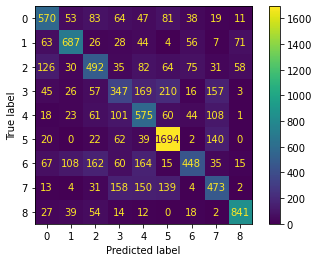

In [92]:
knn = KNeighborsClassifier(n_neighbors=12, weights='uniform')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("accuracy score: ", accuracy_score(Y_test, predictions)*100, '%')
print("\nclassification_report:\n", classification_report(Y_test, predictions, target_names=target_names))
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()
df_scores.loc['part3', 'KNN'] = accuracy_score(Y_test, predictions)*100

### Logistic Regression

accuracy score:  60.74 %

classification_report:
               precision    recall  f1-score   support

  Electronic       0.58      0.60      0.59       966
       Anime       0.63      0.62      0.63       986
        Jazz       0.50      0.43      0.46       993
 Alternative       0.45      0.28      0.35      1030
     Country       0.46      0.57      0.51       991
         Rap       0.76      0.87      0.81      1979
       Blues       0.54      0.46      0.50      1074
        Rock       0.51      0.57      0.54       974
   Classical       0.80      0.82      0.81      1007

    accuracy                           0.61     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.60      0.61      0.60     10000



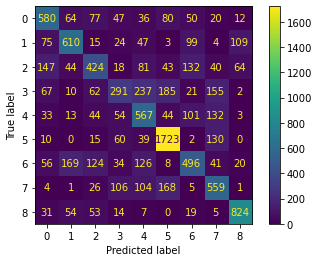

In [93]:
lr = LogisticRegression(solver='newton-cg', penalty='l2')
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("accuracy score: ", accuracy_score(Y_test, predictions)*100, '%')
print("\nclassification_report:\n", classification_report(Y_test, predictions, target_names=target_names))
plot_confusion_matrix(lr, X_test, Y_test)  
plt.show()
df_scores.loc['part3', 'LogReg'] = accuracy_score(Y_test, predictions)*100

## Decision Tree Classifier

accuracy score:  60.64000000000001 %

classification_report:
               precision    recall  f1-score   support

  Electronic       0.54      0.51      0.53       966
       Anime       0.70      0.71      0.71       986
        Jazz       0.46      0.43      0.45       993
 Alternative       0.41      0.32      0.36      1030
     Country       0.53      0.52      0.52       991
         Rap       0.79      0.84      0.81      1979
       Blues       0.53      0.47      0.50      1074
        Rock       0.47      0.65      0.54       974
   Classical       0.82      0.79      0.80      1007

    accuracy                           0.61     10000
   macro avg       0.58      0.58      0.58     10000
weighted avg       0.60      0.61      0.60     10000



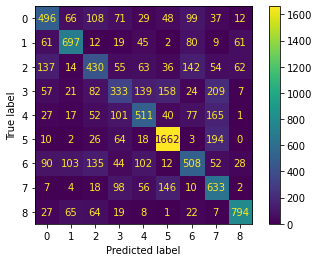

In [94]:
dtc = DecisionTreeClassifier(max_features=None, max_depth=10, criterion='entropy', class_weight=None)
dtc.fit(X_train, Y_train)
predictions = dtc.predict(X_test)
print("accuracy score: ", accuracy_score(Y_test, predictions)*100, '%')
print("\nclassification_report:\n", classification_report(Y_test, predictions, target_names=target_names))
plot_confusion_matrix(dtc, X_test, Y_test)  
plt.show()
df_scores.loc['part3', 'DTree'] = accuracy_score(Y_test, predictions)*100

## Naive Bayes

accuracy score:  51.77 %

classification_report:
               precision    recall  f1-score   support

  Electronic       0.53      0.43      0.47       966
       Anime       0.67      0.35      0.46       986
        Jazz       0.43      0.33      0.37       993
 Alternative       0.37      0.20      0.26      1030
     Country       0.29      0.69      0.41       991
         Rap       0.69      0.85      0.76      1979
       Blues       0.51      0.23      0.31      1074
        Rock       0.49      0.40      0.44       974
   Classical       0.68      0.88      0.76      1007

    accuracy                           0.52     10000
   macro avg       0.52      0.48      0.47     10000
weighted avg       0.54      0.52      0.50     10000



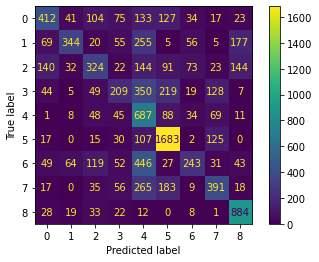

In [95]:
nb = GaussianNB(var_smoothing=0.1)
nb.fit(X_train,Y_train)
predictions = nb.predict(X_test)
print("accuracy score: ", accuracy_score(Y_test, predictions)*100, '%')
print("\nclassification_report:\n", classification_report(Y_test, predictions, target_names=target_names))
plot_confusion_matrix(nb, X_test, Y_test)  
plt.show()
df_scores.loc['part3', 'NBayes'] = accuracy_score(Y_test, predictions)*100

# Final results

Prediction accuracies for applied algorithms

In [99]:
df_scores.round(2)

,KNN,LogReg,DTree,NBayes
part1,52.34,52.82,53.36,44.31
part2,NaN,52.92,53.31,44.40
part3,61.27,60.74,60.64,51.77


The best performance showed prediction with usage of KNN classifier with acuuracy result of 61.27% for 3rd part of modifications - Rap and Hip Hop targets merged.